In [2]:
from retsupp.utils import Subject

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting

In [6]:
import nibabel as nib

t1w = nib.load('/data/ds-retsupp/derivatives/fmriprep/sourcedata/freesurfer/sub-04/mri/orig/001.mgz')
t2w = nib.load('/data/ds-retsupp/derivatives/fmriprep/sourcedata/freesurfer/sub-04/mri/orig/T2raw.mgz')

In [8]:
t1w = nib.Nifti1Image(t1w.get_fdata(), affine=t1w.affine)
t2w = nib.Nifti1Image(t2w.get_fdata(), affine=t2w.affine)



In [9]:
t1w.to_filename('/data/ds-retsupp/sub-04/ses-1/anat/sub-04_ses-1_T1w.nii.gz')
t2w.to_filename('/data/ds-retsupp/sub-04/ses-1/anat/sub-04_ses-1_T2w.nii.gz')

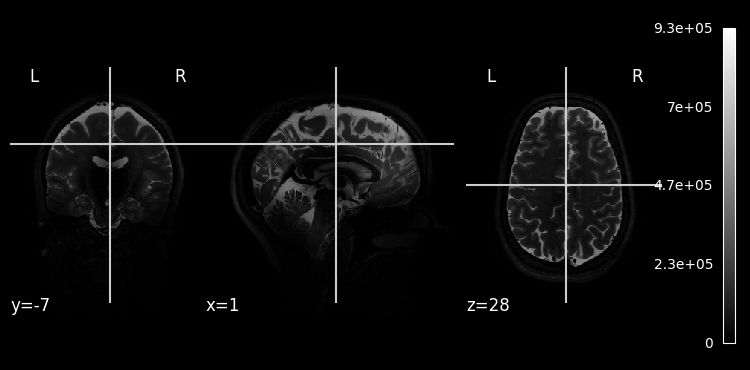

In [7]:
plotting.plot_anat(t2w)

In [16]:
subject_id = '05'
sub = Subject(subject_id)
pars = sub.get_prf_parameters_surface(4)
y, x = pars['y'], pars['x']

# Compute polar angle for each hemisphere
pars['lh_angle'] = np.clip(-np.degrees(np.arctan2(y, x)) + 90, 0, 180)
pars['rh_angle'] = np.clip(-np.degrees(np.arctan2(y, -x)) + 90, 0, 180)
pars.loc['L', 'angle'] = pars['lh_angle']
pars.loc['R', 'angle'] = pars['rh_angle']

In [17]:
pars

x         y        sd   amplitude  baseline        r2  \
hemi                                                                        
L    0       2.030177 -2.193331  0.379953   64.892448 -0.011948  0.223920   
     1       2.188173 -2.190977  0.561741   82.725632 -0.024720  0.305568   
     2       1.858401 -2.173117  0.377437   67.454056 -0.039039  0.221423   
     3       2.005548 -2.219813  0.604396   95.241905 -0.076571  0.314029   
     4       2.294715 -2.305910  0.788413  115.803368 -0.078619  0.399158   
...               ...       ...       ...         ...       ...       ...   
R    327538 -0.640944 -0.037631  0.856068   12.726591 -0.022429  0.065318   
     327539 -1.376078  1.295950  0.856544   19.096340 -0.028057  0.049421   
     327540 -2.187990 -1.722945  1.000000    4.136402 -0.023077  0.009700   
     327541 -0.076499 -2.522142  1.084157    9.522426 -0.048568  0.023027   
     327542  0.931780  0.343051  0.804962   13.462167 -0.043644  0.043193   

                theta       ecc  srf_size  srf_amplitude  hrf_delay  \
hemi                                                                  
L    0      -0.826369  3.046237  7.578331       0.083318   5.626448   
     1      -0.791607  3.142412  5.145288       0.114347   5.760369   
     2      -0.855595  2.915536  4.548091       0.097806   5.420099   
     3      -0.834232  3.032032  2.551932       0.137367   5.688135   
     4      -0.793271  3.289784  2.873602       0.149075   5.949755   
...               ...       ...       ...            ...        ...   
R    327538  0.756867  1.909003  3.230644       0.125779   2.885985   
     327539  1.661028  2.874097  4.862445       0.010151   1.122586   
     327540 -2.389475  3.141503  2.000000       0.001000   0.000000   
     327541 -1.643252  3.215611  2.119774       0.007002   0.123587   
     327542  0.286196  2.161942  2.143438       0.048798   2.029727   

             hrf_dispersion    lh_angle    rh_angle       angle  
hemi                                                             
L    0             1.499784  137.212234  180.000000  137.212234  
     1             1.177913  135.036682  180.000000  135.036682  
     2             1.259351  139.463684  180.000000  139.463684  
     3             0.887891  137.902939  180.000000  137.902939  
     4             0.818709  135.139420  180.000000  135.139420  
...                     ...         ...         ...         ...  
R    327538        0.477849  180.000000   93.360107   93.360107  
     327539        0.258523    0.000000   46.717667   46.717667  
     327540        0.000000  180.000000  128.218857  128.218857  
     327541        0.047327  180.000000  178.262695  178.262695  
     327542        0.101578   69.787918    0.000000    0.000000  

[641160 rows x 15 columns]

In [1]:
from nilearn.surface import load_surf_data

In [11]:
load_surf_data('/data/ds-retsupp/derivatives/freesurfer/sub-05/surf/lh.prf_vexpl.mgz')

array([0.22391963, 0.3055676 , 0.22142269, ..., 0.03002058, 0.00944035,
       0.01931171], dtype='>f4')

In [ ]:
subject_id = '03'

sub = Subject(subject_id)


sub.get

<Axes: xlabel='x', ylabel='y'>

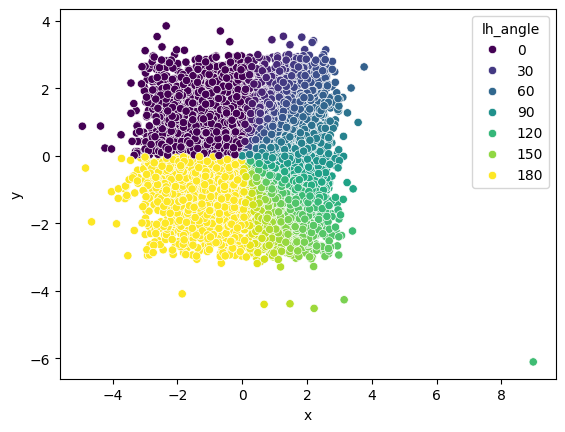

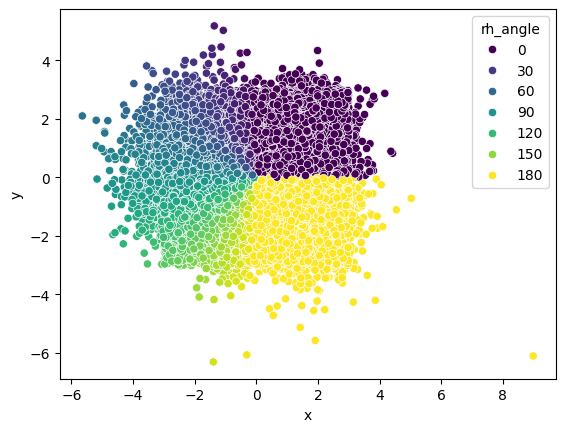

In [4]:
subject_id = '03'

sub = Subject(subject_id)

pars = sub.get_prf_parameters_surface(4)

y, x = pars['y'], pars['x']

# Left Hemisphere (LH)
pars['lh_angle'] = np.clip(-np.degrees(np.arctan2(y, x)) + 90, 0, 180)

# Right Hemisphere (RH)
pars['rh_angle'] = np.clip(-np.degrees(np.arctan2(y, -x)) + 90, 0, 180)

sns.scatterplot(data=pars.iloc[::100], x='x', y='y', hue='lh_angle', palette='viridis')
plt.figure()
sns.scatterplot(data=pars.iloc[::10], x='x', y='y', hue='rh_angle', palette='viridis')

In [15]:
pars.loc['L', 'angle'] = pars['lh_angle']
pars.loc['R', 'angle'] = pars['rh_angle']

In [35]:
import numpy as np
import nibabel as nib
from pathlib import Path

bids_dir = Path("/data/ds-retsupp")
freesurfer_dir = (
    bids_dir
    / "derivatives"
    / "fmriprep"
    / "sourcedata"
    / "freesurfer"
    / f"sub-{sub.subject_id:02d}"
)

# Map (parameter → filename suffix)
param_map = {
    "angle": "prf_angle",
    "ecc": "prf_eccen",
    "r2": "prf_vexpl",
    "sd": "prf_radius"
}

for hemi, prefix in zip(["L", "R"], ['lh', 'rh']):
    for param, suffix in param_map.items():
        data = np.asarray(pars.loc[hemi, param], dtype=np.float32)[np.newaxis, np.newaxis, :]
        data[~np.isfinite(data)] = 0  # or another appropriate value
        img = nib.MGHImage(data, affine=np.eye(4))
        out_file = freesurfer_dir / "surf" / f"{prefix}.{suffix}.mgz"
        nib.save(img, out_file)
        print(np.isnan(data).any(), data.shape)


False (1, 1, 260793)
False (1, 1, 260793)
False (1, 1, 260793)
False (1, 1, 260793)
False (1, 1, 264924)
False (1, 1, 264924)
False (1, 1, 264924)
False (1, 1, 264924)


In [31]:
data.dtype

dtype('float32')

In [27]:
np.isnan(data).any()

False

In [39]:
from neuropythy.vision import register_retinotopy, clean_retinotopy

In [41]:
clean_retinotopy?

Signature:
clean_retinotopy(
    hemi,
    retinotopy=Ellipsis,
    mask=Ellipsis,
    weight=Ellipsis,
    surface='midgray',
    min_weight=Ellipsis,
    min_eccentricity=0.5,
    visual_area=Ellipsis,
    map_visual_areas=Ellipsis,
    visual_area_field_signs=Ellipsis,
    method=['L-BFGS-B', 'TNC'],
    measurement_uncertainty=0.4,
    measurement_knob=[0, -3, -2, -2, -2, -1, -1, 0, 0],
    magnification_knob=0,
    fieldsign_knob=0,
    edge_knob=0,
    rt_knob=0,
    yield_report=False,
    steps=[50, 50, 25, 50, 25, 100, 100, 100, 100],
    jitter=None,
    average=[True, False, True, False, False, False, False, False, False],
    initial_retinotopy=None,
    output_style='visual',
    round_fn=None,
)
Docstring:
clean_retinotopy(hemi) attempts to cleanup the retinotopic maps on the given cortical mesh by
  minimizing an objective function that tracks the smoothness of the fields, the orthogonality
  of polar angle to eccentricity, and the deviation of the values from the measur

In [38]:
register_retinotopy?

Signature:
register_retinotopy(
    hemi,
    model='benson17',
    model_hemi=Ellipsis,
    polar_angle=None,
    eccentricity=None,
    weight=None,
    pRF_radius=None,
    weight_min=0.1,
    eccentricity_range=None,
    partial_voluming_correction=False,
    radius_weight=1,
    field_sign_weight=1,
    invert_rh_field_sign=False,
    invert_rh_angle=False,
    field_sign=None,
    scale=20.0,
    sigma=Ellipsis,
    select='close',
    prior=None,
    resample=Ellipsis,
    radius=1.0471975511965976,
    max_steps=2000,
    max_step_size=0.05,
    method='random',
    yield_imap=False,
)
Docstring:
register_retinotopy(hemi) registers the given hemisphere object, hemi, to a model of V1, V2,
  and V3 retinotopy, and yields a copy of hemi that is identical but additionally contains
  the registration 'retinotopy', whose coordinates are aligned with the model.

Registration attempts to align the vertex positions of the hemisphere's spherical surface with a
model of polar angle and ec

<Axes: xlabel='x', ylabel='y'>

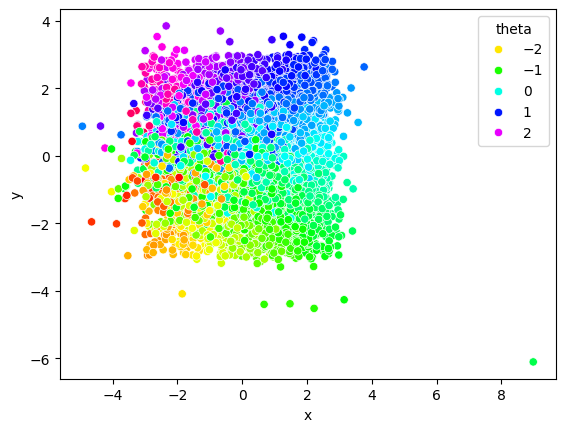

In [31]:
sns.scatterplot(pars.iloc[::100], x='x', y='y', hue='theta', palette='hsv')

In [32]:
pars

x         y        sd  amplitude  baseline        r2  \
hemi                                                                       
L    0       0.210825 -2.481252  0.705867  90.215492 -0.262054  0.604143   
     1       0.154081 -2.328405  0.756881  90.791443 -0.268807  0.603756   
     2       0.147914 -2.524133  0.646715  86.308983 -0.241063  0.609001   
     3       0.105163 -2.422260  0.680759  89.990623 -0.260265  0.622617   
     4       0.081701 -1.864854  0.733028  83.983521 -0.279254  0.555778   
...               ...       ...       ...        ...       ...       ...   
R    264919  2.009371 -2.599369  0.749501  43.589436 -0.036804  0.111429   
     264920 -1.519953 -0.570334  1.603866  14.976175 -0.033812  0.112260   
     264921 -0.894466  0.626508  1.000000   2.729997 -0.016651  0.008159   
     264922 -2.161146  0.274337  1.000185   7.794837 -0.026087  0.006507   
     264923 -1.978313 -0.216249  1.010015  12.582818 -0.075796  0.021892   

                theta       ecc  srf_size  srf_amplitude  hrf_delay  \
hemi                                                                  
L    0      -1.488158  2.494982  2.150450       0.152566   6.023458   
     1      -1.479917  2.378007  2.314258       0.182871   6.353692   
     2      -1.513412  2.532912  2.325481       0.123161   5.969079   
     3      -1.497279  2.471973  2.574071       0.134396   6.272216   
     4      -1.267954  2.229233  2.242742       0.203289   6.389399   
...               ...       ...       ...            ...        ...   
R    264919 -1.067415  3.455470  2.693298       0.065194   5.353620   
     264920 -2.110606  2.110032  5.517944       0.237791   4.698433   
     264921  0.868325  2.678051  2.000000       0.001000   0.000000   
     264922  0.296953  3.412590  2.000000       0.001000   0.000000   
     264923 -1.257924  3.019354  2.170045       0.002576   0.506154   

             hrf_dispersion  
hemi                         
L    0             1.457068  
     1             1.293738  
     2             1.563157  
     3             1.434079  
     4             1.173303  
...                     ...  
R    264919        1.125811  
     264920        0.706870  
     264921        0.000000  
     264922        0.000000  
     264923        0.058166  

[525717 rows x 12 columns]

<Axes: xlabel='x', ylabel='y'>

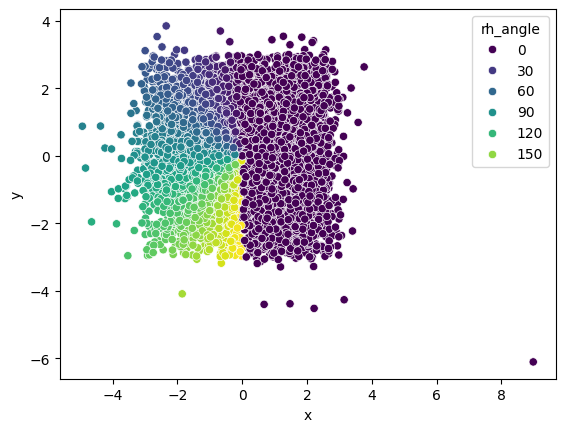

In [73]:
import numpy as np
import matplotlib.pyplot as plt

pars['lh_angle'] =  np.clip(-np.arctan2(pars['y'], pars['x']) * 180 / np.pi + 90, 0, 180)
pars['rh_angle'] = np.clip(-np.arctan2(pars['x'], pars['y']) * 180 / np.pi, 0, 180)


# import numpy as np

# import numpy as np
# def polar_angle(x, y, left=True):
#     angle = np.arctan2(y, x)  # [-pi, pi]

#     if left:
#         angle_deg = -np.degrees(angle) + 90  # [-180, 180]

#     angle_deg = (angle_deg) / 2  # [0, 360)
# #     angle_deg = np.where(angle_deg > 180, angle_deg - 180, angle_deg)  # [0, 180)
#     return angle_deg

# pars['lh_angle'] = polar_angle(pars['x'], pars['y'])
# pars['rh_angle'] = polar_angle(pars['x'], pars['y'])  # Use same convention for both

sns.scatterplot(pars.iloc[::100], x='x', y='y', hue='rh_angle', palette='viridis')

# plt.figure()
# sns.scatterplot(pars.iloc[::100], x='x', y='y', hue='rh_angle', palette='viridis')

<Axes: xlabel='x', ylabel='y'>

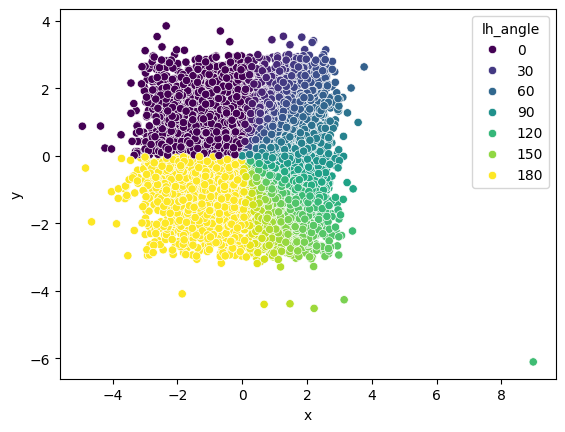

In [ ]:
y, x = pars['y'], pars['x']
lh_angle = np.arctan2(y, x)  # Returns angle in radians, between -π and π
lh_angle_deg = -np.degrees(lh_angle)  # Convert to degrees
lh_angle_deg += 90  # Rotate so that 0° is at the top (UVM)
lh_angle_deg = np.clip(lh_angle_deg, 0, 180)  # Clip to [0, 180]

pars['lh_angle'] = lh_angle_deg


y, x = pars['y'], pars['x']  # Assuming these are visual field coordinates

# Calculate polar angle for the right hemisphere
rh_angle = np.arctan2(y, -x)  # Flip x-axis to match RH convention
rh_angle_deg = -np.degrees(rh_angle)  # Convert to degrees and invert
rh_angle_deg += 90  # Rotate so that 0° is at the top (UVM)
rh_angle_deg = np.clip(rh_angle_deg, 0, 180)  # Clip to [0, 180]

pars['rh_angle'] = rh_angle_deg


<Axes: xlabel='x', ylabel='y'>

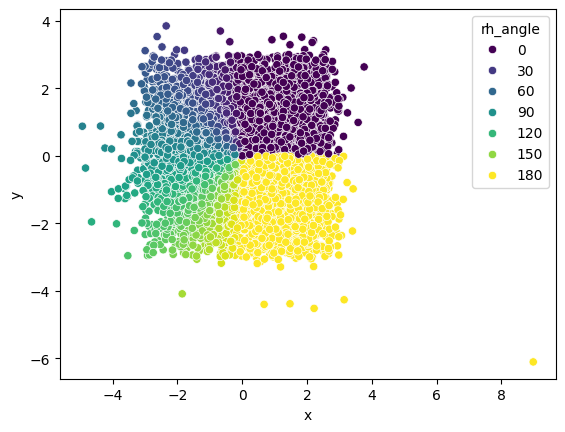

In [36]:
from py4j.java_gateway import java_import, JavaGateway
import os

# Print the JAVA_HOME environment variable (if set)
print("JAVA_HOME:", os.environ.get('JAVA_HOME'))

# Try to launch the Java gateway
try:
    gateway = JavaGateway.launch_gateway(classpath="/Users/gdehol/mambaforge/envs/retsupp/lib/python3.11/site-packages/py4j/py4j0.10.9.7.jar")
    java_import(gateway.jvm, "java.lang.System")
    java_version = gateway.jvm.System.getProperty("java.version")
    print("Java version:", java_version)
    print("Java is accessible from Python!")
except Exception as e:
    print("Failed to access Java from Python. Error:", e)

JAVA_HOME: None
Java version: 1.8.0_461
Java is accessible from Python!
